**My First ML Project**

**Loading Dataset**

In [6]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Sample - Superstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.shape

(9994, 21)

In [24]:
# Display dataset columns and their meanings
print("Column Names and Meanings:")
print(df.columns)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:")
print(df.duplicated().sum())

# Check data types and basic statistics
print("\nData Types and Statistics:")
print(df.info())
print(df.describe())


Column Names and Meanings:
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Duplicate Rows:
0

Data Types and Statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         ---------

Total Sales by Category:
Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


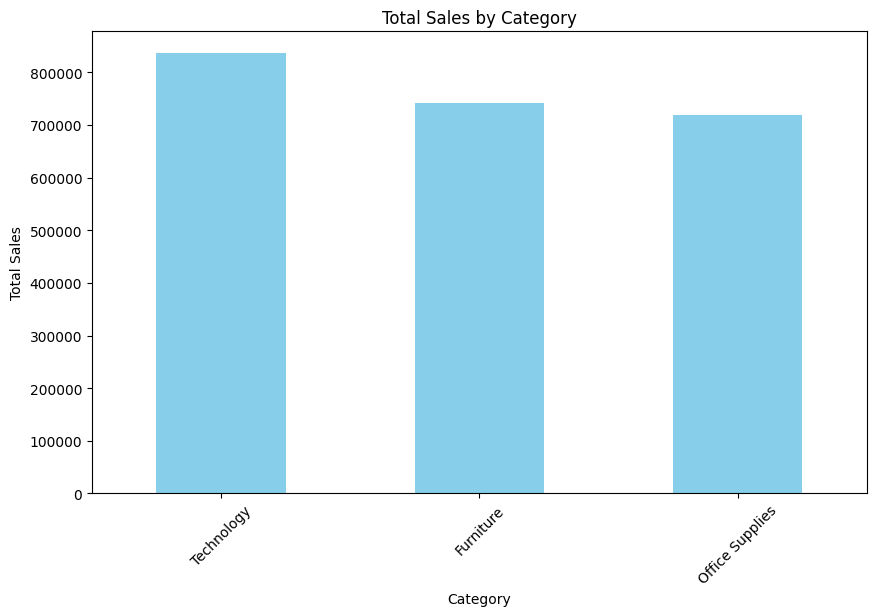

In [25]:
# Total Sales by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Total Sales by Category:")
print(category_sales)

# Visualize Total Sales by Category
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()



Total Profit by Category:
Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


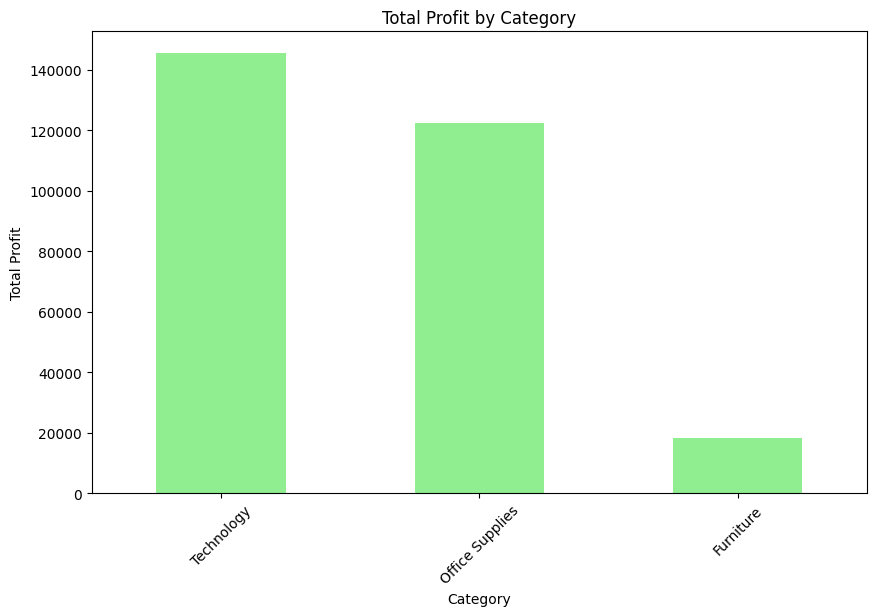

In [26]:
# Total Profit by Category
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print("\nTotal Profit by Category:")
print(category_profit)

# Visualize Total Profit by Category
plt.figure(figsize=(10, 6))
category_profit.plot(kind='bar', color='lightgreen')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()


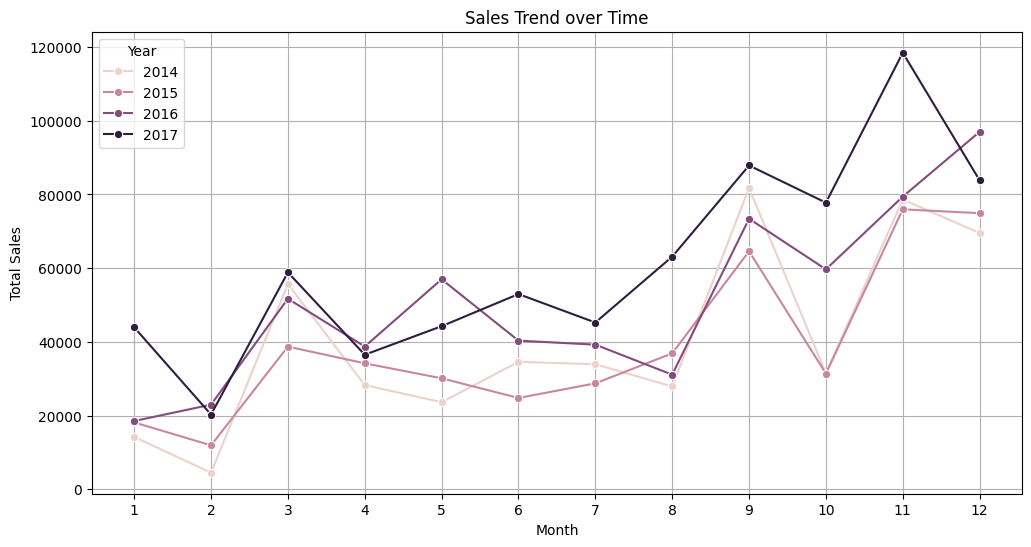

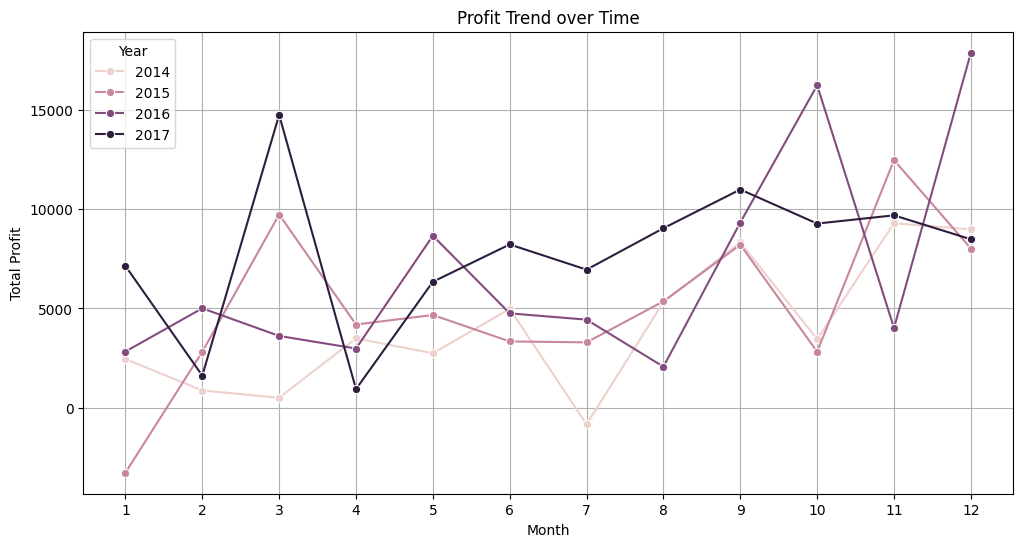

In [27]:
# Extract month and year from Order Date
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Total Sales and Profit by Month and Year
sales_profit_monthly = df.groupby(['Year', 'Month']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Visualize Sales and Profit Trend over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_profit_monthly, x='Month', y='Sales', hue='Year', marker='o')
plt.title('Sales Trend over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year', loc='upper left')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_profit_monthly, x='Month', y='Profit', hue='Year', marker='o')
plt.title('Profit Trend over Time')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.legend(title='Year', loc='upper left')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()



Total Sales by Region:
Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64


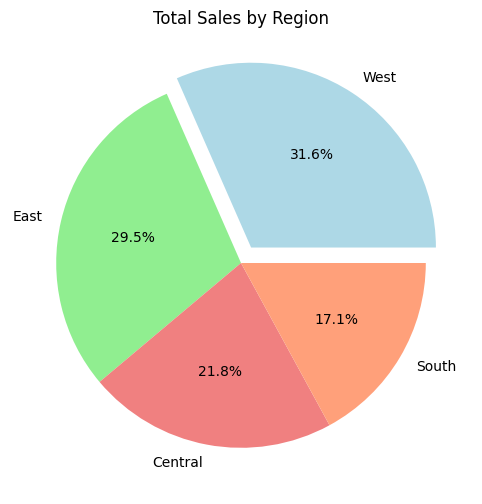

In [28]:
# Total Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("\nTotal Sales by Region:")
print(region_sales)

# Visualize Total Sales by Region
plt.figure(figsize=(8, 6))
region_sales.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon'], explode=(0.1, 0, 0, 0))
plt.title('Total Sales by Region')
plt.ylabel('')
plt.show()



Total Quantity Sold by Category:
Category
Office Supplies    22906
Furniture           8028
Technology          6939
Name: Quantity, dtype: int64


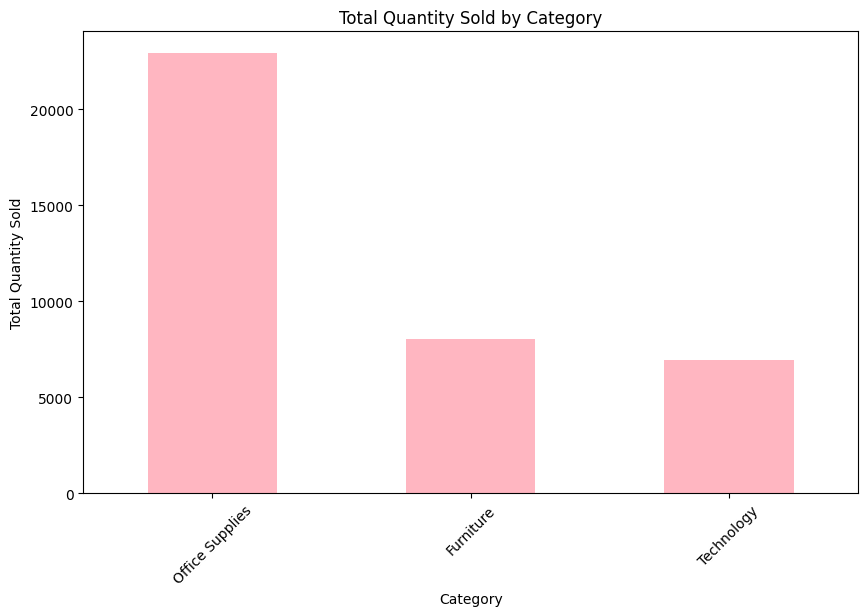

In [29]:
# Total Quantity Sold by Category
category_quantity = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print("\nTotal Quantity Sold by Category:")
print(category_quantity)

# Visualize Total Quantity Sold by Category
plt.figure(figsize=(10, 6))
category_quantity.plot(kind='bar', color='lightpink')
plt.title('Total Quantity Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


<ipython-input-30-fc5a645b4ada>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  discount_profit = df.groupby('Discount').mean()[['Profit']].reset_index()
<ipython-input-30-fc5a645b4ada>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_profit, x='Discount', y='Profit', palette='viridis')


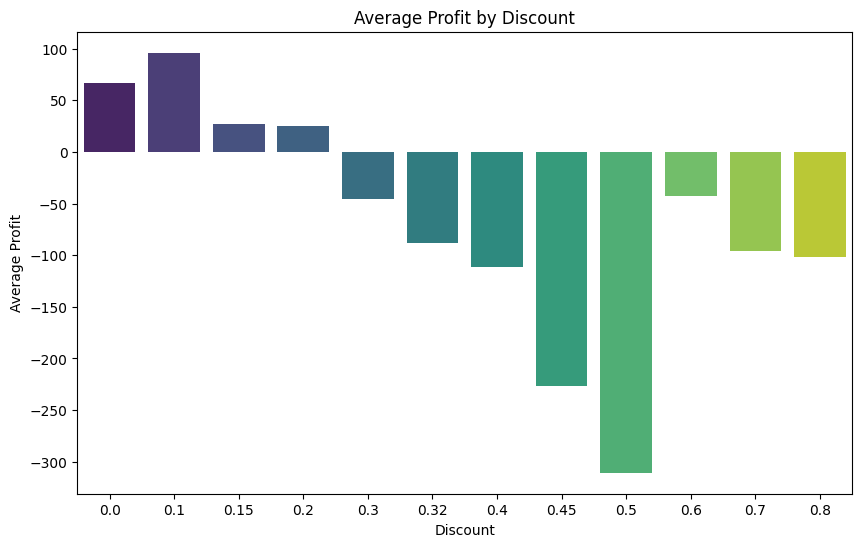

In [30]:
# Average Discount and Profit
discount_profit = df.groupby('Discount').mean()[['Profit']].reset_index()

# Visualize Average Profit by Discount
plt.figure(figsize=(10, 6))
sns.barplot(data=discount_profit, x='Discount', y='Profit', palette='viridis')
plt.title('Average Profit by Discount')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.show()


<ipython-input-14-736f7ac6d0a0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_sales_profit, x='Segment', y='Sales', palette='coolwarm', alpha=0.8, label='Sales')
<ipython-input-14-736f7ac6d0a0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_sales_profit, x='Segment', y='Profit', palette='copper', alpha=0.8, label='Profit')


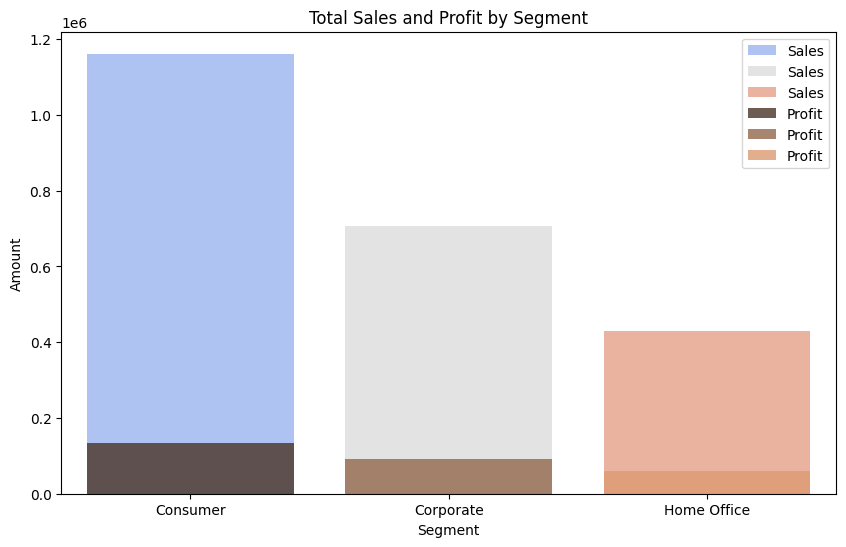

In [14]:
# Total Sales and Profit by Segment
segment_sales_profit = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Visualize Total Sales and Profit by Segment
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_sales_profit, x='Segment', y='Sales', palette='coolwarm', alpha=0.8, label='Sales')
sns.barplot(data=segment_sales_profit, x='Segment', y='Profit', palette='copper', alpha=0.8, label='Profit')
plt.title('Total Sales and Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Amount')
plt.legend()
plt.show()


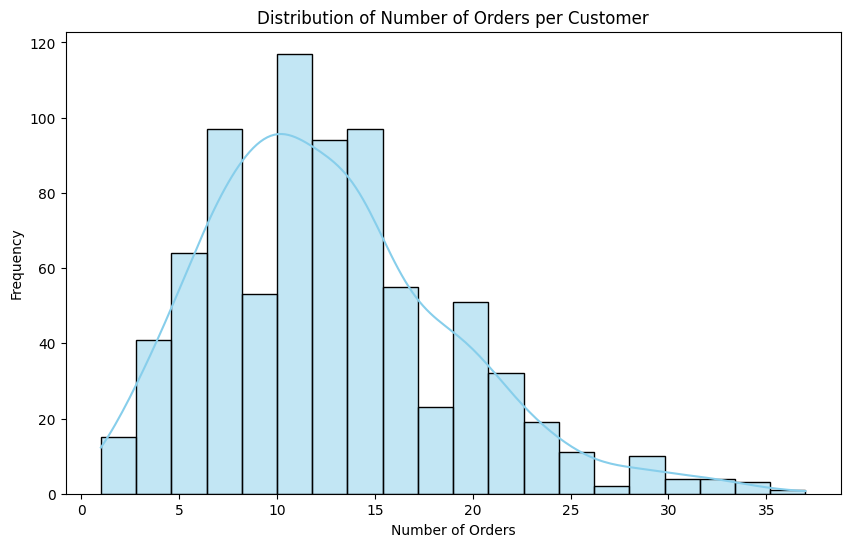

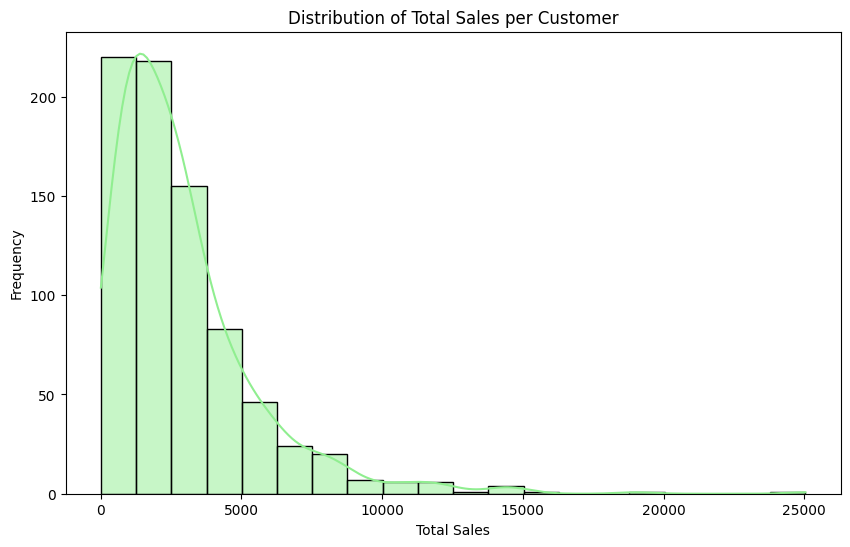

In [15]:
# Number of Orders per Customer
orders_per_customer = df.groupby('Customer ID')['Order ID'].count().reset_index()
orders_per_customer.columns = ['Customer ID', 'Number of Orders']

# Visualize Number of Orders per Customer
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_customer['Number of Orders'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

# Total Sales per Customer
sales_per_customer = df.groupby('Customer ID')['Sales'].sum().reset_index()

# Visualize Total Sales per Customer
plt.figure(figsize=(10, 6))
sns.histplot(sales_per_customer['Sales'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Total Sales per Customer')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()


<ipython-input-16-1d7a639d2512>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_mode_counts.index, y=shipping_mode_counts.values, palette='pastel')


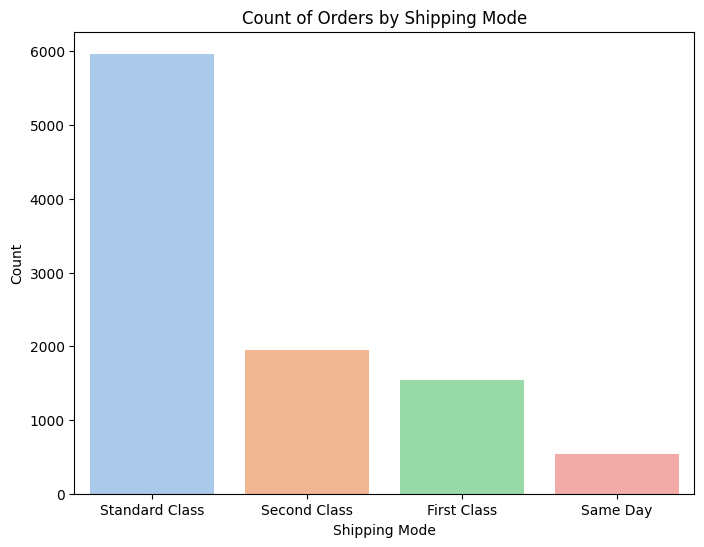

In [16]:
# Count of Orders by Shipping Mode
shipping_mode_counts = df['Ship Mode'].value_counts()

# Visualize Count of Orders by Shipping Mode
plt.figure(figsize=(8, 6))
sns.barplot(x=shipping_mode_counts.index, y=shipping_mode_counts.values, palette='pastel')
plt.title('Count of Orders by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.show()


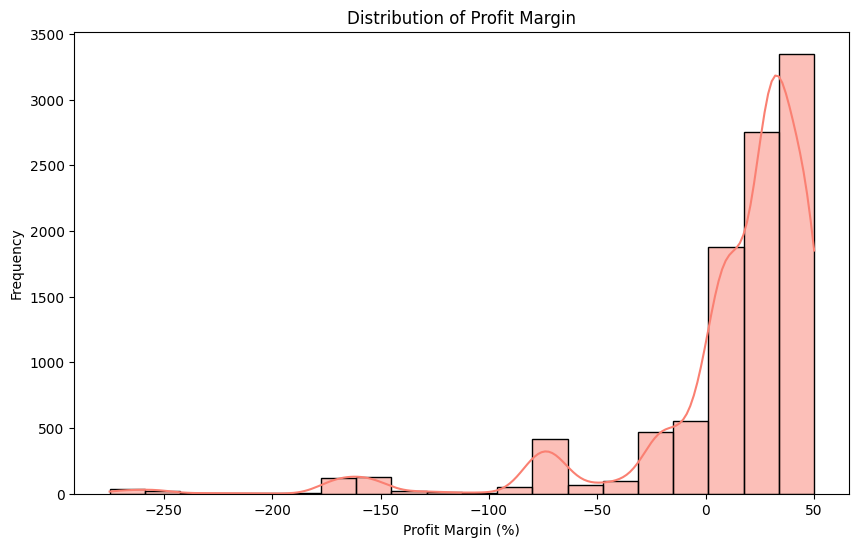

In [17]:
# Calculate Profit Margin
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Visualize Profit Margin Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit Margin'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Profit Margin')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.show()


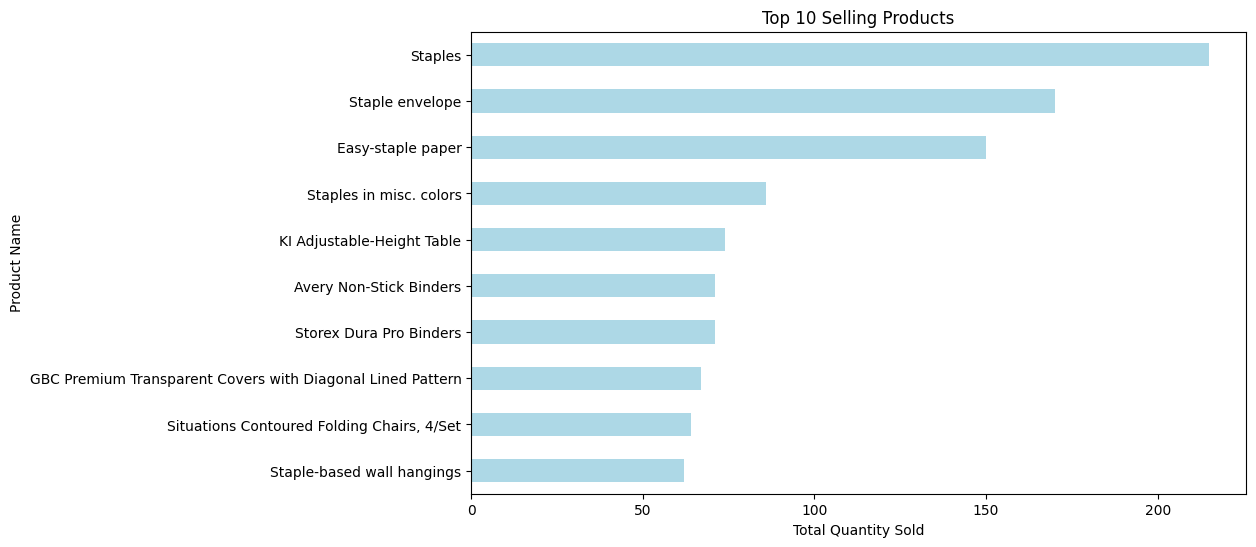

In [18]:
# Top 10 Selling Products
top_products = df.groupby('Product Name')['Quantity'].sum().nlargest(10)

# Visualize Top 10 Selling Products
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='lightblue')
plt.title('Top 10 Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.show()


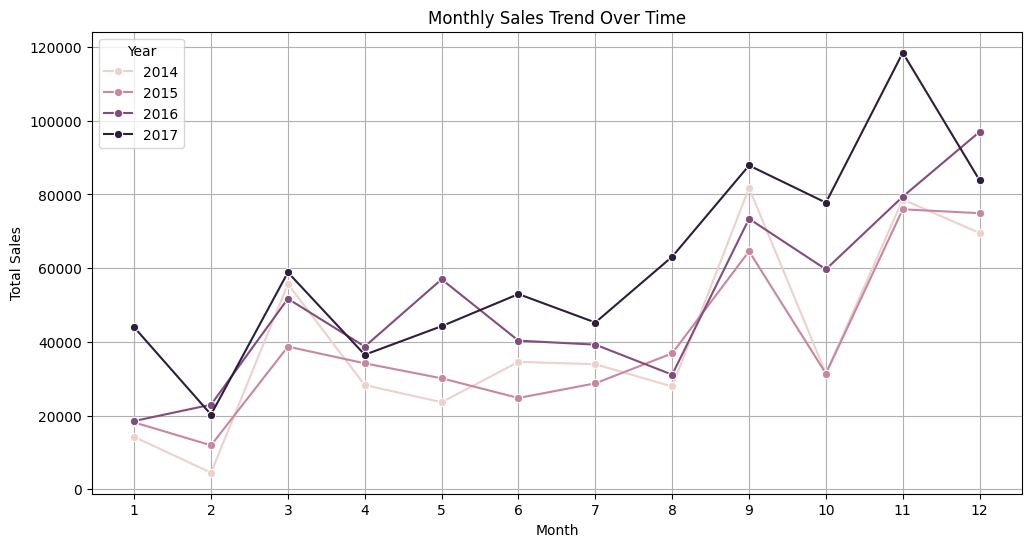

In [19]:
# Extracting Year and Month from Order Date
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Grouping Sales by Year and Month
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Visualize Sales Trend Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o')
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


<ipython-input-31-7872a98087e1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=profit_by_region, palette='coolwarm')


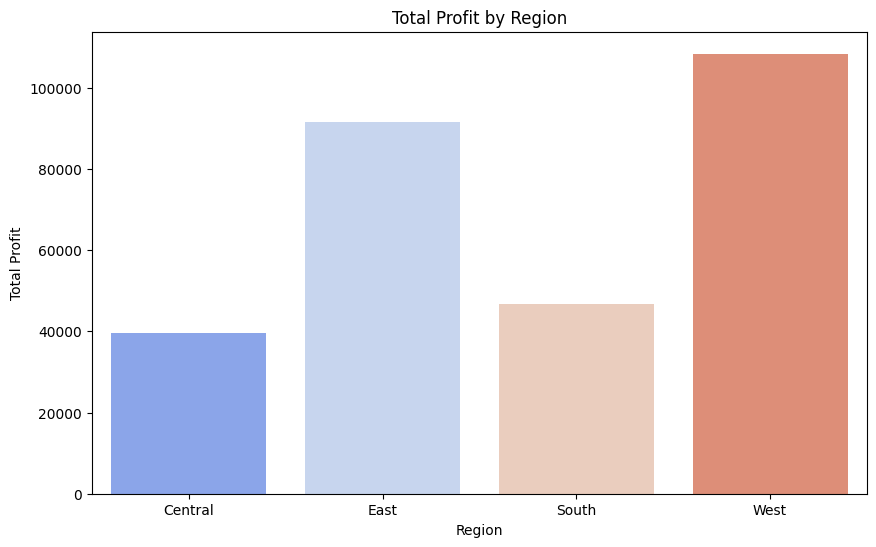

In [31]:
# Calculate Total Profit by Region
profit_by_region = df.groupby('Region')['Profit'].sum().reset_index()

# Visualize Profit by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=profit_by_region, palette='coolwarm')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()


<ipython-input-32-0d8103523ec3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=sales_by_category, palette='Set3')


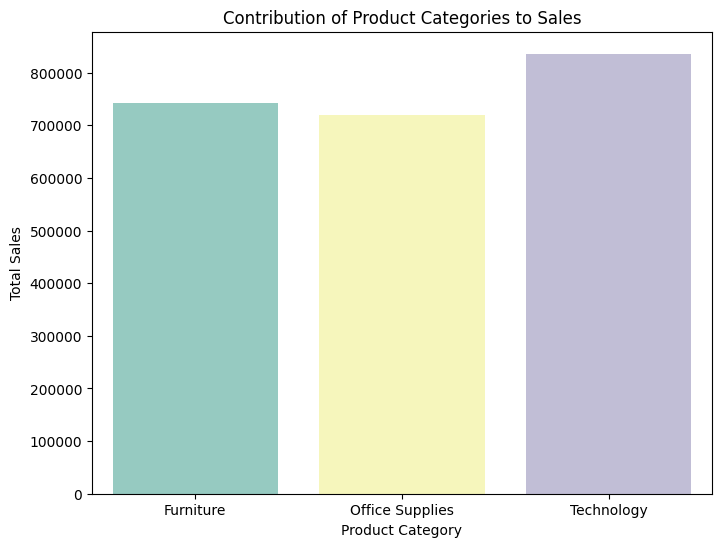

In [32]:
# Calculate Total Sales by Product Category
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

# Visualize Contribution of Product Categories to Sales
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Sales', data=sales_by_category, palette='Set3')
plt.title('Contribution of Product Categories to Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()


<ipython-input-33-578f738aca8a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='pastel')


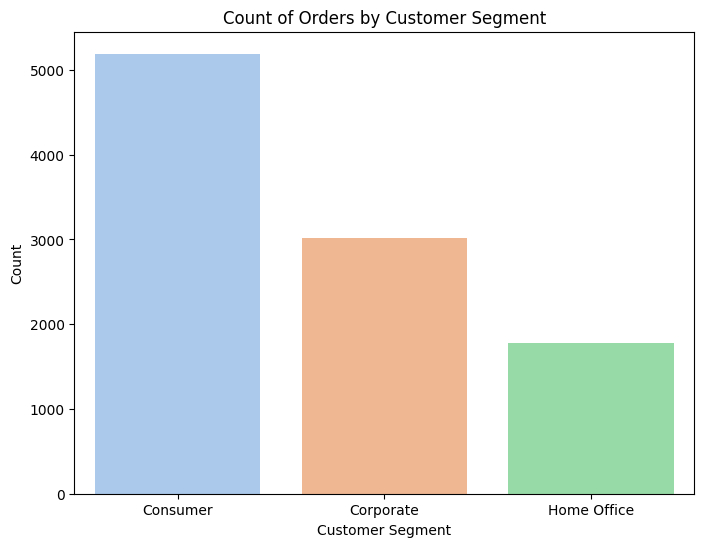

In [33]:
# Count of Orders by Customer Segment
segment_counts = df['Segment'].value_counts()

# Visualize Count of Orders by Customer Segment
plt.figure(figsize=(8, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='pastel')
plt.title('Count of Orders by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


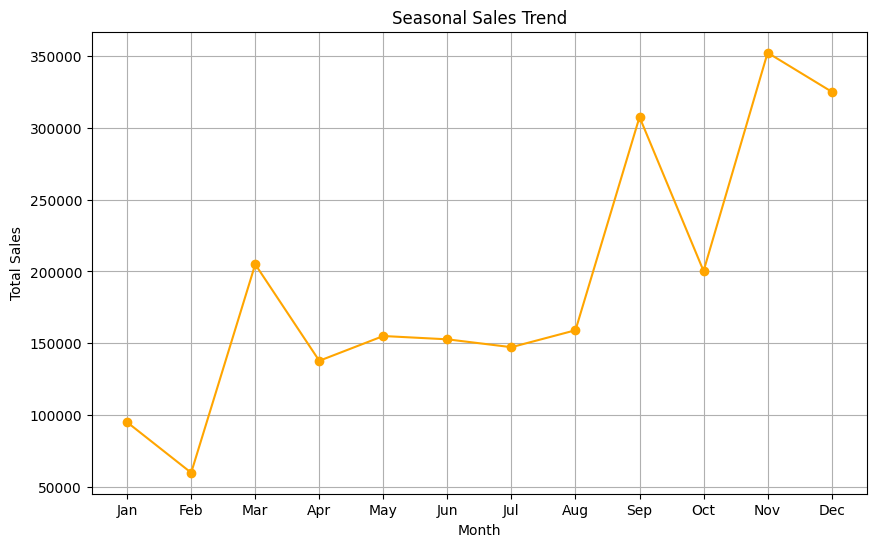

In [40]:
# Extract month from order date
df['Order Month'] = df['Order Date'].dt.month

# Calculate total sales by month
sales_by_month = df.groupby('Order Month')['Sales'].sum()

# Visualize seasonal sales trend
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='line', marker='o', color='orange')
plt.title('Seasonal Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


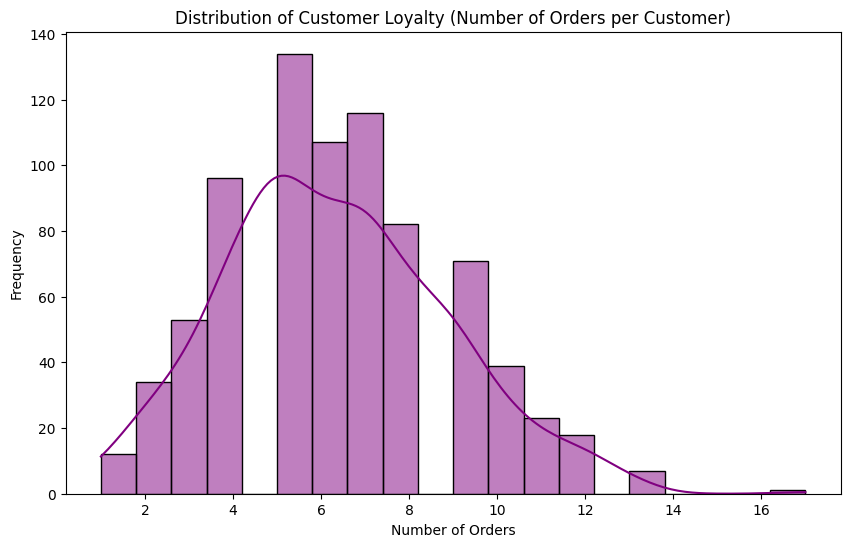

In [41]:
# Calculate number of unique orders per customer
orders_per_customer = df.groupby('Customer ID')['Order ID'].nunique()

# Visualize customer loyalty distribution
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_customer, bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Loyalty (Number of Orders per Customer)')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


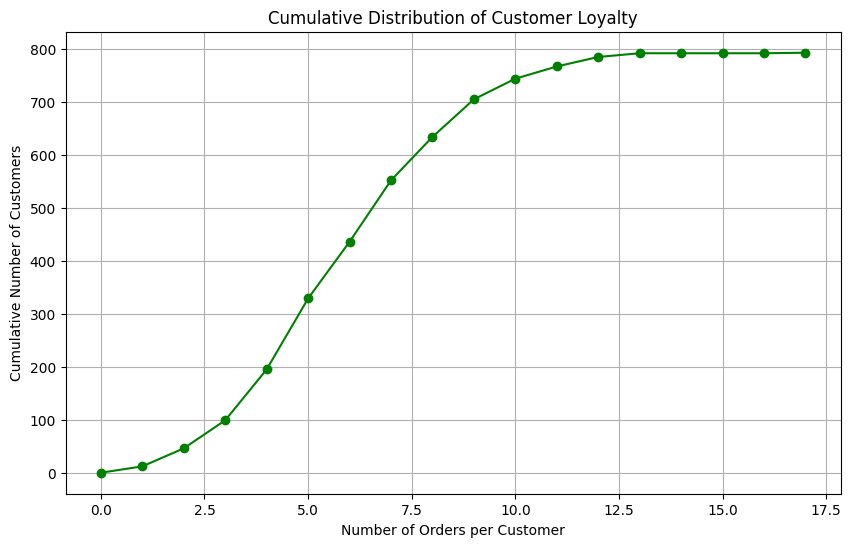

In [42]:
# Importing necessary libraries
import numpy as np

# Calculate cumulative distribution of orders per customer
cumulative_orders = np.cumsum(np.bincount(orders_per_customer))

# Plotting cumulative distribution of customer loyalty
plt.figure(figsize=(10, 6))
plt.plot(range(len(cumulative_orders)), cumulative_orders, marker='o', color='green')
plt.title('Cumulative Distribution of Customer Loyalty')
plt.xlabel('Number of Orders per Customer')
plt.ylabel('Cumulative Number of Customers')
plt.grid(True)
plt.show()


In [45]:
pip install fbprophet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 29.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


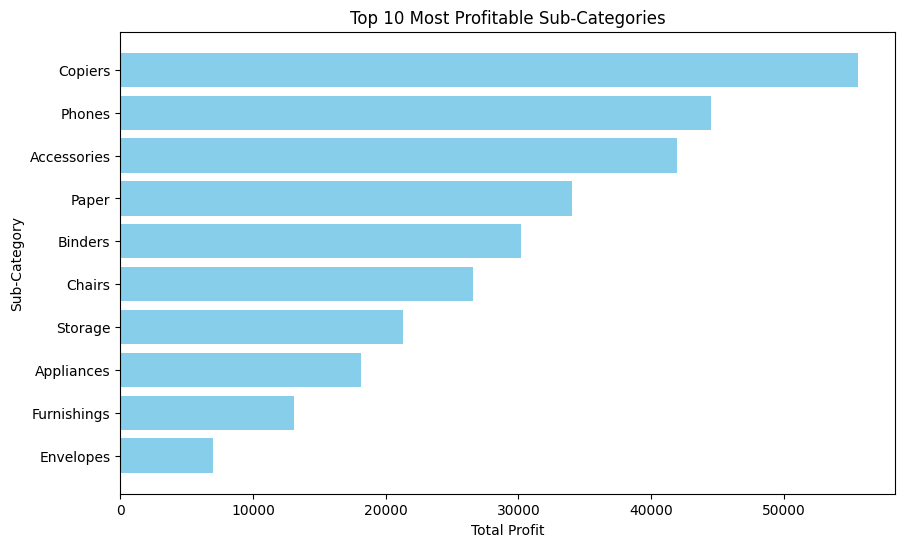

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Assuming the dataset is already loaded into a DataFrame named 'df'

# Group the data by Category and Sub-Category, and calculate the total profit
profit_by_category = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()

# Sort the data by total profit in descending order
profit_by_category = profit_by_category.sort_values(by='Profit', ascending=False)

# Plot the top 10 most profitable sub-categories
plt.figure(figsize=(10, 6))
top_categories = profit_by_category.head(10)
plt.barh(top_categories['Sub-Category'], top_categories['Profit'], color='skyblue')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.title('Top 10 Most Profitable Sub-Categories')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest profit at the top
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


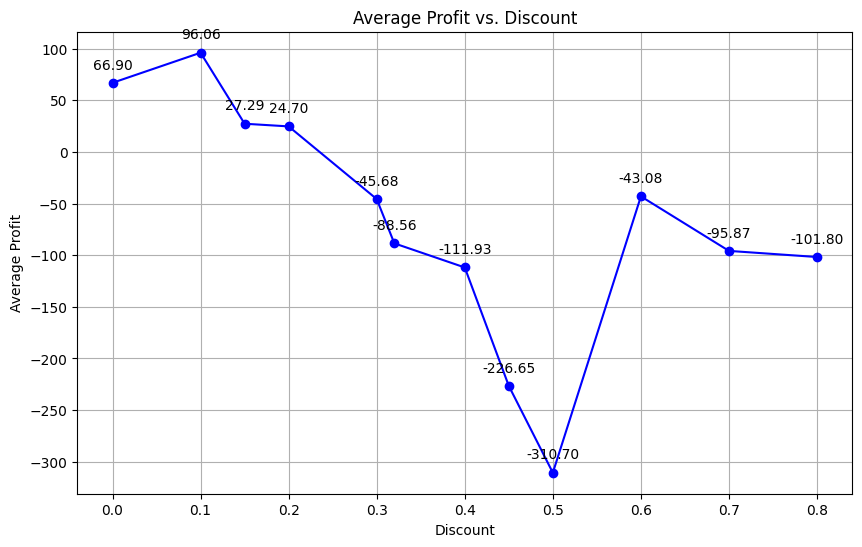

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Assuming your dataset is already loaded into a DataFrame named 'df'

# Calculate the average profit for different levels of discounts
discount_profit = df.groupby('Discount')['Profit'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(discount_profit['Discount'], discount_profit['Profit'], marker='o', color='b', linestyle='-')
plt.title('Average Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.grid(True)

# Annotate the points for better understanding
for i, txt in enumerate(discount_profit['Profit']):
    plt.annotate(f'{txt:.2f}', (discount_profit['Discount'][i], discount_profit['Profit'][i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-60-db9397b77cd7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Category', data=profit_by_category, palette='viridis')
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, co

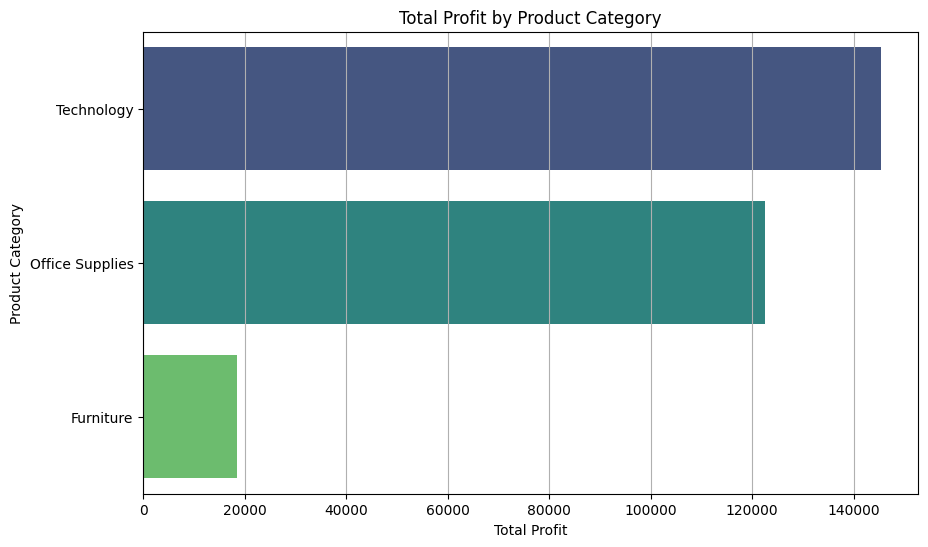

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Assuming df is the DataFrame containing your data

# Calculate total profit by product category
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()

# Sort the data by total profit in descending order
profit_by_category = profit_by_category.sort_values(by='Profit', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Category', data=profit_by_category, palette='viridis')
plt.title('Total Profit by Product Category')
plt.xlabel('Total Profit')
plt.ylabel('Product Category')
plt.grid(axis='x')
plt.show()


Mean Squared Error: 958.3633646265156


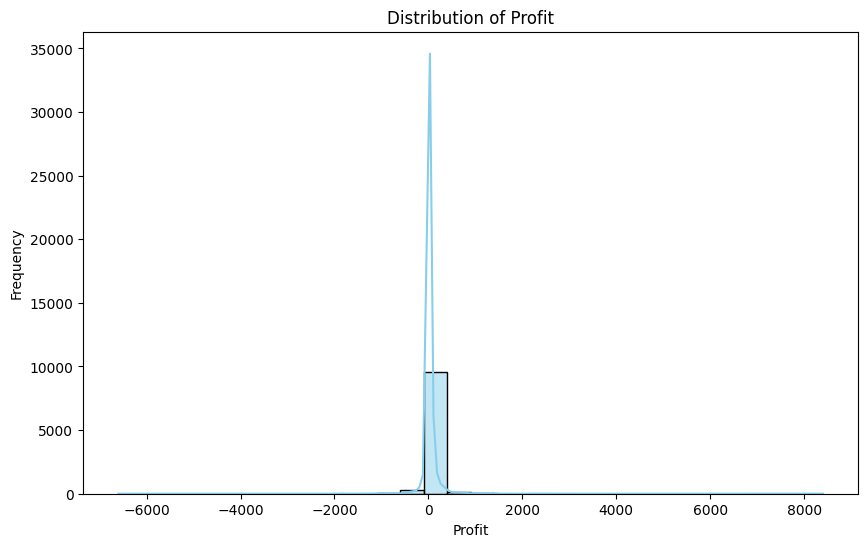

<ipython-input-4-7687f02e7c41>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Profit', data=data, palette='viridis')


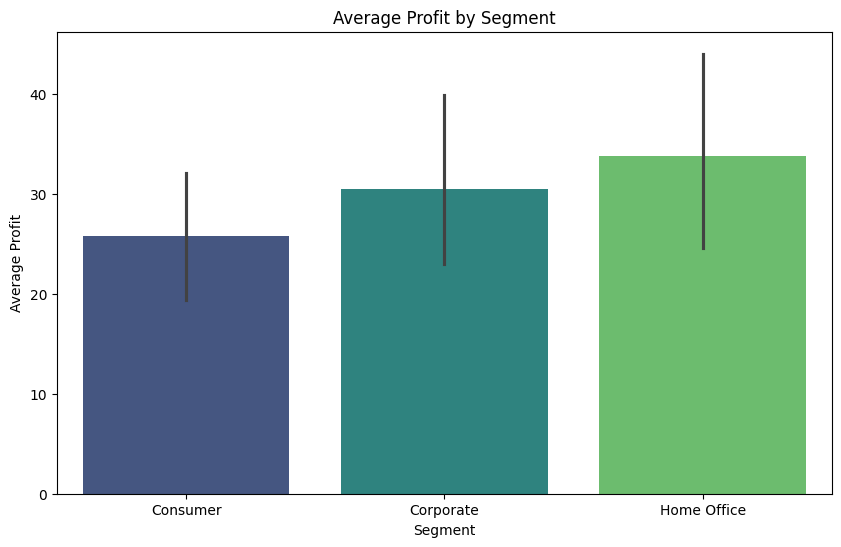

<ipython-input-4-7687f02e7c41>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit', data=data, palette='magma')


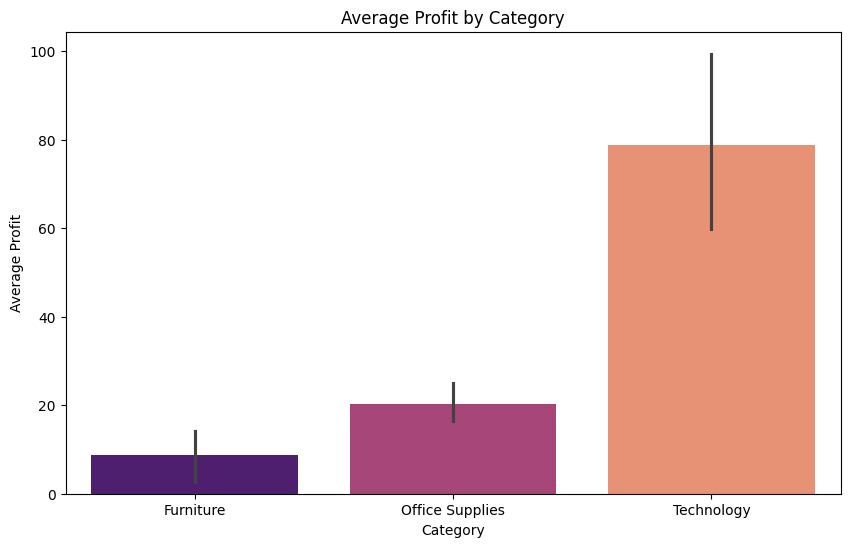

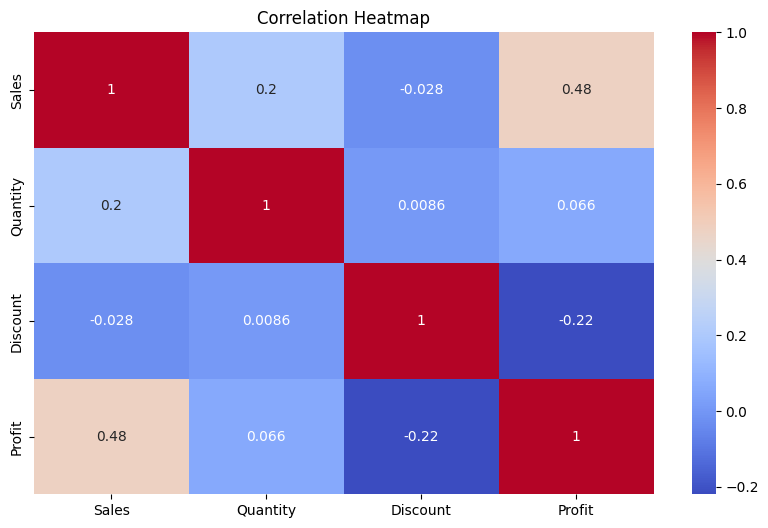

In [4]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Sample - Superstore.xls')  # Replace "your_dataset.csv" with the path to your dataset

# Select relevant features
features = ['Sales', 'Quantity', 'Discount', 'Profit']  # Choose relevant features for analysis

# Preprocessing - No preprocessing needed for this example

# Split data into features and target variable
X = data[features]
y = data['Profit']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model (Random Forest Regressor is used as an example)
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Visualizations

# Distribution of Profit
plt.figure(figsize=(10, 6))
sns.histplot(data['Profit'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

# Bar plot of average Profit by Segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Profit', data=data, palette='viridis')
plt.title('Average Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Profit')
plt.show()

# Bar plot of average Profit by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=data, palette='magma')
plt.title('Average Profit by Category')
plt.xlabel('Category')
plt.ylabel('Average Profit')
plt.show()

# Heatmap showing correlation between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
